# 1. K-NN classifier

**Question** How does the k-NN algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [113]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [114]:
def read_data(path):
    df = pd.read_csv(path)
    # drop the 'name' column from the DataFrame in place (modifies the original DataFrame directly)
    df.drop(columns=['name'], inplace=True)
    # extract status column as series
    y = df['status']
    # drop the 'status' column from the dataframe
    df.drop(columns=['status'], inplace=True)

    return (df, y)

data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [115]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [116]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?
* Are the attributes on the common scale?
* Are observations equally distributed for sick and healthy people?

Plot the histogram of the assigned class and analyse the distribution.


In [117]:
# number of attributes
num_attributes = data_X.shape[1]
print(f"Number of attributes: {num_attributes}")
# list of attributes
attributes = data_X.columns.tolist()
print(f"Attributes: {attributes}")

Number of attributes: 22
Attributes: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [118]:
# are attributes on the common scale?
print(data_X.describe())


       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

Attributes **are not** on the same scale, some of theme represent Hz other dB and others even percentage.

In [119]:
# are observations eqqually distributed for sick and healthy people?
class_distribution = data_Y.value_counts()
print("\nClass distribution:")
print(class_distribution)


Class distribution:
status
1    147
0     48
Name: count, dtype: int64


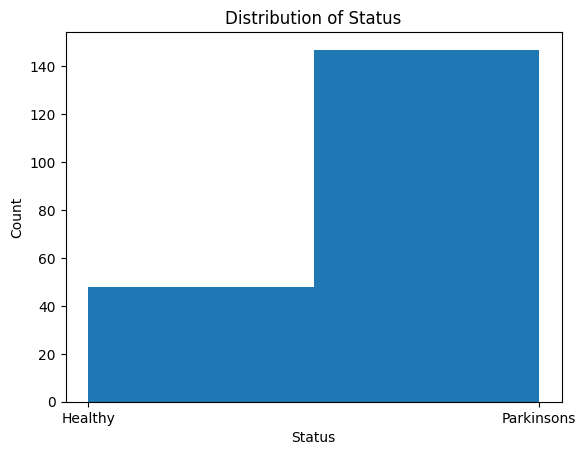

In [120]:
# histogram of assigned classes
plt.hist(data_Y, bins=2)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.xticks([0, 1], ['Healthy', 'Parkinsons'])
plt.show()

Plot the histograms of the first 5 attributes. 

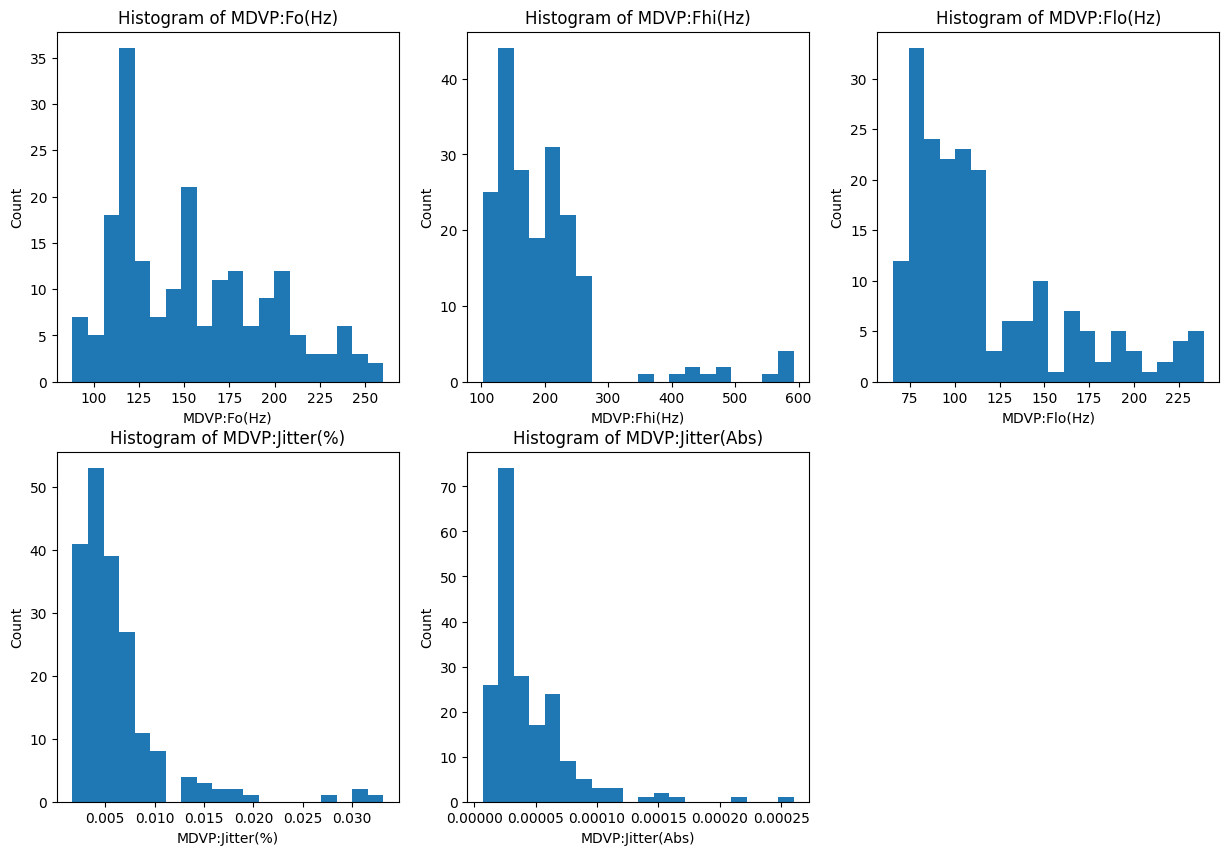

In [121]:
# histograms of the first 5 attributes. 
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.hist(data_X.iloc[:, i], bins=20)
    plt.xlabel(data_X.columns[i])
    plt.ylabel('Count')
    plt.title(f'Histogram of {data_X.columns[i]}')
plt.show()


# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [122]:
def split_data(data_X, data_Y, test_percent):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=test_percent, random_state=5)
    return (X_train, y_train, X_test, y_test)
    
(train_X, train_Y, test_X, test_Y) = split_data(data_X, data_Y, 0.2)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  156
rows in test set: 39


# 4. Data standarization/normalization
#### 4.1. Use k-NN algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [123]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data_X, train_data_Y)
    predictions = knn.predict(test_data_X)
    accuracy = metrics.accuracy_score(test_data_Y, predictions)
    return accuracy

print("Accuracy:", get_classification_accuracy(train_X, train_Y, test_X, test_Y))

Accuracy: 0.7692307692307693


#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [124]:
# transforms the data so that each feature has a mean of 0 and a standard deviation of 1.
def standarize(train_X, test_X):
    scaler = preprocessing.StandardScaler()
    scaler.fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)
    return (train_X, test_X)

In [125]:
# scales each feature to a range [0, 1].
def minmax(train_X, test_X):
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)
    return (train_X, test_X)

In [126]:
# scales each feature to a range [-1, 1].
def maxabs(train_X, test_X):
    scaler = preprocessing.MaxAbsScaler()
    scaler.fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)
    return (train_X, test_X)

In [127]:
print("Accuracy before preprocessing:", get_classification_accuracy(train_X, train_Y, test_X, test_Y))

Accuracy before preprocessing: 0.7692307692307693


In [128]:
standarized_train_X, standarized_test_X = standarize(train_X, test_X)
print("Accuracy after standardization:", get_classification_accuracy(standarized_train_X, train_Y, standarized_test_X, test_Y))
minmax_train_X, minmax_test_X = minmax(train_X, test_X)
print("Accuracy after minmax scaling:", get_classification_accuracy(minmax_train_X, train_Y, minmax_test_X, test_Y))
maxabs_train_X, maxabs_test_X = maxabs(train_X, test_X)
print("Accuracy after maxabs scaling:", get_classification_accuracy(maxabs_train_X, train_Y, maxabs_test_X, test_Y))

all_train_X, all_test_X = standarize(train_X, test_X)
all_train_X, all_test_X = minmax(all_train_X, all_test_X)
all_train_X, all_test_X = maxabs(all_train_X, all_test_X)
print("Accuracy after all preprocessing:", get_classification_accuracy(all_train_X, train_Y, all_test_X, test_Y))


Accuracy after standardization: 0.9743589743589743
Accuracy after minmax scaling: 0.9743589743589743
Accuracy after maxabs scaling: 0.9743589743589743
Accuracy after all preprocessing: 0.9743589743589743


Each method gives same results so we will just use standarization

In [129]:
maxabs_train_X

array([[0.61173757, 0.28531156, 0.60547309, ..., 0.43203113, 0.72451473,
        0.28767253],
       [0.66864151, 0.32554938, 0.36032947, ..., 0.46677529, 0.74627122,
        0.48079611],
       [0.47057919, 0.25108525, 0.47589163, ..., 0.74493943, 0.72850343,
        0.69908432],
       ...,
       [0.68543473, 0.74797561, 0.34311578, ..., 0.8725019 , 0.8251525 ,
        0.47779251],
       [0.77574057, 0.44373934, 0.32708116, ..., 0.35492227, 0.67855424,
        0.21396485],
       [0.48638819, 0.23944057, 0.41715098, ..., 0.5391005 , 0.77179376,
        0.71768427]], shape=(156, 22))

In [130]:
minmax_train_X

array([[0.41207531, 0.13629321, 0.45675153, ..., 0.42400933, 0.50540504,
        0.20280715],
       [0.49824186, 0.18492095, 0.11919813, ..., 0.4592442 , 0.54446574,
        0.41893911],
       [0.19832685, 0.09493044, 0.2783228 , ..., 0.74133704, 0.51256618,
        0.66323378],
       ...,
       [0.52367091, 0.69542648, 0.09549553, ..., 0.87070116, 0.68608596,
        0.41557766],
       [0.66041613, 0.32775447, 0.07341647, ..., 0.34581141, 0.42288945,
        0.12031806],
       [0.22226556, 0.08085775, 0.19743917, ..., 0.53259091, 0.59028787,
        0.68404969]], shape=(156, 22))

In [131]:
standarized_train_X

array([[ 1.20771132e-01, -2.83526809e-01,  6.66366786e-01, ...,
        -3.60451119e-01,  2.71884735e-01, -6.14338939e-01],
       [ 4.75621012e-01, -2.22724479e-03, -7.04803291e-01, ...,
        -1.73169972e-01,  4.73377677e-01,  5.34369593e-01],
       [-7.59484810e-01, -5.22800298e-01, -5.84256113e-02, ...,
         1.32621591e+00,  3.08825153e-01,  1.83275864e+00],
       ...,
       [ 5.80342604e-01,  2.95092222e+00, -8.01085245e-01, ...,
         2.01381483e+00,  1.20391948e+00,  5.16504027e-01],
       [ 1.14348488e+00,  8.24029706e-01, -8.90772223e-01, ...,
        -7.76090347e-01, -1.53768392e-01, -1.05275587e+00],
       [-6.60900748e-01, -6.04207367e-01, -3.86981638e-01, ...,
         2.16683996e-01,  7.09749145e-01,  1.94339206e+00]],
      shape=(156, 22))

In [132]:
def standarize_train_and_test(train_X, test_X):
    scaler = preprocessing.StandardScaler()
    # fit the scaler on the training data
    scaler.fit(train_X)
    # transform the training data
    train_X = scaler.transform(train_X)
    # transform the test data
    test_X = scaler.transform(test_X)
    
    return train_X, test_X

stand_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)
get_classification_accuracy(stand_train_X, train_Y, norm_test_X, test_Y)

0.9743589743589743

# 5. Choosing k value
Using train set with normalization/standarization obtained in the previous exercices run k-NN algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

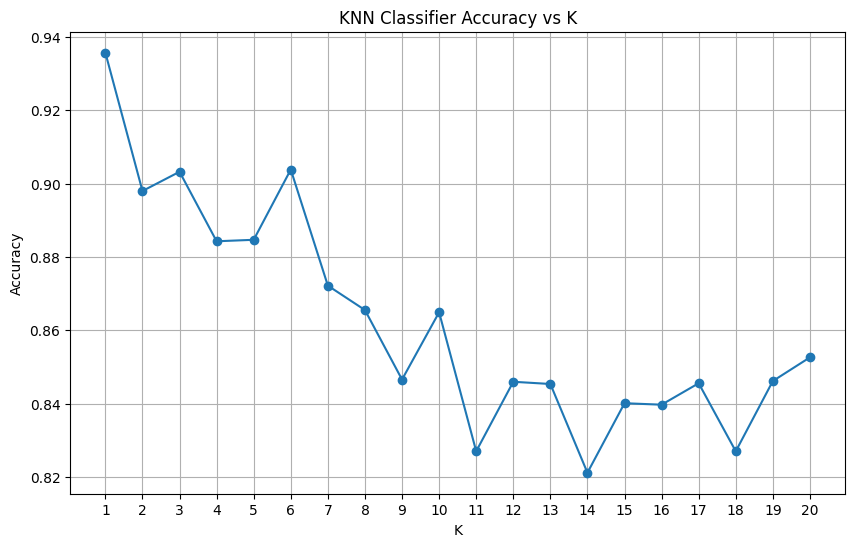

In [133]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# split the data into 5 folds, to get more accurate results
kf = KFold(n_splits=5, shuffle=True)
cross_val_results = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    # validate model on all folds
    scores = cross_validate(knn, stand_train_X, train_Y, cv=kf)
    cross_val_results.append((k, scores['test_score'].mean()))


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in cross_val_results], [x[1] for x in cross_val_results], marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs K')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [134]:
get_classification_accuracy(stand_train_X, train_Y, norm_test_X, test_Y, 1)


0.9743589743589743

# 7. Homework
Finish all the above tasks in this notebook that you have not finished during class.

You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value.

Write a short **report** (may be in this notebook as a separate section below) containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification was used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.   
    

In [237]:
df = pd.read_csv('winequality-red.csv')
# get 'quality' column as series
y = df['quality']
# drop the 'quality' column from the dataframe
df.drop(columns=['quality'], inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [238]:
print("Number of attributes: ", df.shape[1])
print("Number of rows: ", df.shape[0])
print("Attributes: ", df.columns.tolist())
print("Class distribution: ", y.value_counts())


Number of attributes:  11
Number of rows:  1599
Attributes:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Class distribution:  quality
poor      744
medium    638
good      217
Name: count, dtype: int64


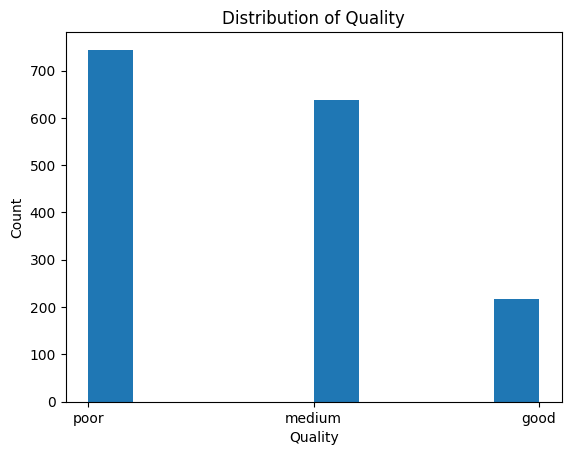

In [239]:
plt.hist(y, bins=10)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality')
plt.show()

In [240]:
# split the data into train and test sets
(train_X, test_X, train_Y,  test_Y) = train_test_split(df, y, test_size=0.2, shuffle=True, stratify=y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  1279
rows in test set: 320


In [241]:
print("Accuracy:", get_classification_accuracy(train_X, train_Y, test_X, test_Y))

Accuracy: 0.540625


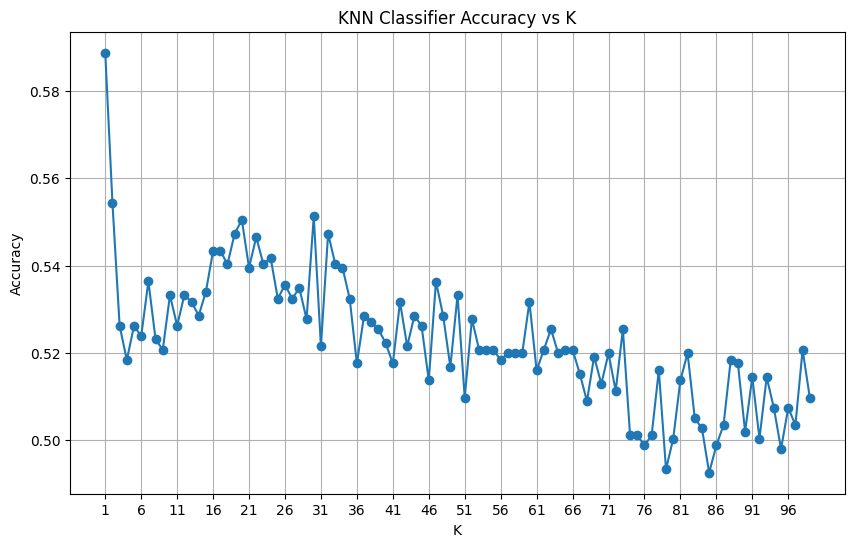

In [242]:
from sklearn.model_selection import KFold

def cross_validate_model(train_X, train_Y, k = 3):
    kf = KFold(n_splits=5, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_Y)
    scores = cross_validate(knn, train_X, train_Y, cv=kf)
    return scores['test_score'].mean()

def create_plot_for_different_k(train_X, train_Y):
    results = []
    for k in range(1, 100):
        results.append((k, cross_validate_model(train_X, train_Y, k)))
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot([x[0] for x in results], [x[1] for x in results], marker='o')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Accuracy vs K')
    plt.xticks(range(1, 100,5))
    plt.grid()
    plt.show()

create_plot_for_different_k(train_X, train_Y)

In [243]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [244]:


standarized_train_X, standarized_test_X = standarize(train_X, test_X)
print("Accuracy after standardization:", get_classification_accuracy(standarized_train_X, train_Y, standarized_test_X, test_Y))
minmax_train_X, minmax_test_X = minmax(train_X, test_X)
print("Accuracy after minmax scaling:", get_classification_accuracy(minmax_train_X, train_Y, minmax_test_X, test_Y))
maxabs_train_X, maxabs_test_X = maxabs(train_X, test_X)
print("Accuracy after maxabs scaling:", get_classification_accuracy(maxabs_train_X, train_Y, maxabs_test_X, test_Y))

all_train_X, all_test_X = standarize(train_X, test_X)
all_train_X, all_test_X = minmax(all_train_X, all_test_X)
all_train_X, all_test_X = maxabs(all_train_X, all_test_X)
print("Accuracy after all preprocessing:", get_classification_accuracy(all_train_X, train_Y, all_test_X, test_Y))

Accuracy after standardization: 0.621875
Accuracy after minmax scaling: 0.61875
Accuracy after maxabs scaling: 0.61875
Accuracy after all preprocessing: 0.61875


In [254]:
# preprocessing
# normalization
norm_train_X, norm_test_X = maxabs(train_X, test_X)
print("Accuracy :", get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y))


Accuracy : 0.61875


# Report
For preprocessing, we decided to use normalization only. This is because k-NN relies on Euclidean distance, and if we want each feature to contribute equally to the distance calculation, we need to scale them to the same range [0,1].

The train/test split was done with shuffling to ensure that the assignment of samples to either set is random. Additionally, we used stratification, since the classes are not equally distributed (there are fewer "good" wines than other categories). Stratification helps maintain the same class proportions in both the training and test sets, which leads to more reliable evaluation results.

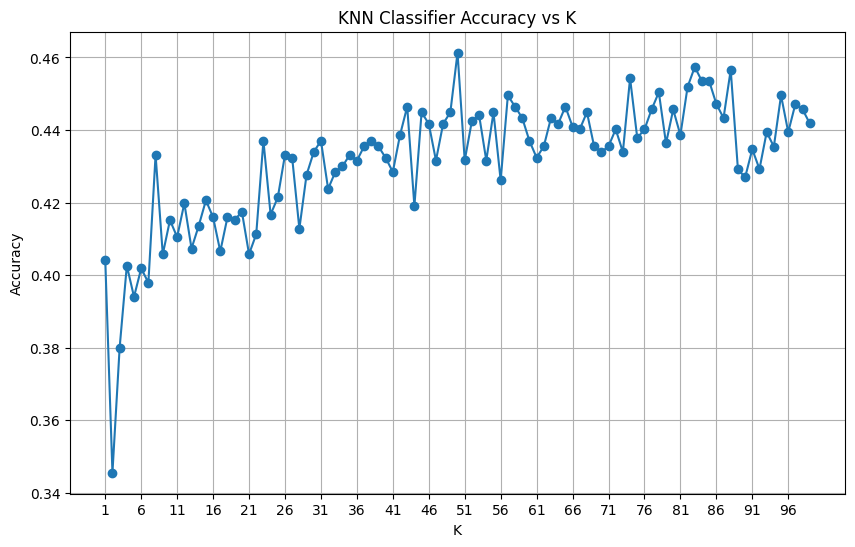

In [246]:
create_plot_for_different_k(stand_train_X, train_Y)

In [255]:
print("Accuracy:", get_classification_accuracy(train_X, train_Y, test_X, test_Y,50))


Accuracy: 0.55625
